In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
df = tf.keras.datasets.cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = df.load_data()

170500096/170498071 [==============================] - 11s 0us/step


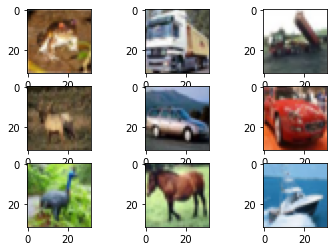

In [4]:
for i in range(0,9):
  plt.subplot(330+1+i)
  plt.imshow(train_images[i])

In [6]:
print('TRAINING DATA: ', train_images.shape, train_labels.shape)
print('TESTING DATA: ', test_images.shape, test_labels.shape)

TRAINING DATA:  (50000, 32, 32, 3) (50000, 1)
TESTING DATA:  (10000, 32, 32, 3) (10000, 1)


In [7]:
train_images = train_images.reshape(train_images.shape[0], 32,32,3)
test_images = test_images.reshape(test_images.shape[0], 32,32,3)

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

In [11]:
cnn_model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(216, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         7

In [25]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [26]:
cnn_history = cnn_model.fit(train_images, train_labels, epochs=20, validation_split=0.2, callbacks = tf.keras.callbacks.EarlyStopping())

Epoch 1/20
1250/1250 [==============================] - 71s 57ms/step - loss: 0.7997 - accuracy: 0.7164 - val_loss: 0.7986 - val_accuracy: 0.7203
Epoch 2/20
1250/1250 [==============================] - 72s 57ms/step - loss: 0.7710 - accuracy: 0.7275 - val_loss: 0.7956 - val_accuracy: 0.7205
Epoch 3/20
1250/1250 [==============================] - 71s 57ms/step - loss: 0.7414 - accuracy: 0.7378 - val_loss: 0.7771 - val_accuracy: 0.7293
Epoch 4/20
1250/1250 [==============================] - 74s 59ms/step - loss: 0.7194 - accuracy: 0.7454 - val_loss: 0.7505 - val_accuracy: 0.7411
Epoch 5/20
1250/1250 [==============================] - 72s 57ms/step - loss: 0.6988 - accuracy: 0.7527 - val_loss: 0.7492 - val_accuracy: 0.7425
Epoch 6/20
1250/1250 [==============================] - 70s 56ms/step - loss: 0.6850 - accuracy: 0.7584 - val_loss: 0.7526 - val_accuracy: 0.7410


In [27]:
cnn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 5s 14ms/step - loss: 0.7668 - accuracy: 0.7355


[0.7668293118476868, 0.7354999780654907]

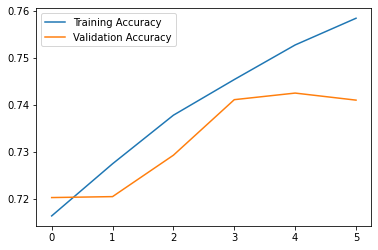

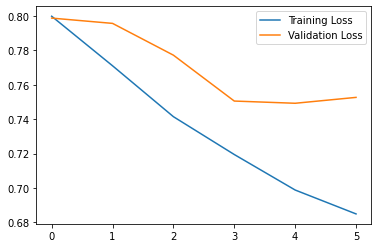

In [28]:
cnn_acc = cnn_history.history['accuracy']
cnn_loss = cnn_history.history['loss']
cnn_val_acc = cnn_history.history['val_accuracy']
cnn_val_loss = cnn_history.history['val_loss']

cnn_epochs = range(len(cnn_acc))

plt.plot(cnn_epochs, cnn_acc, label='Training Accuracy')
plt.plot(cnn_epochs, cnn_val_acc, label='Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(cnn_epochs, cnn_loss, label='Training Loss')
plt.plot(cnn_epochs, cnn_val_loss, label='Validation Loss')
plt.legend()